Matplotlib is building the font cache; this may take a moment.


Enter your data points (X and y values). Enter 'done' when finished.


Enter X and y values separated by space (e.g., '1.0 2.5'):  1.0 2.5
Enter X and y values separated by space (e.g., '1.0 2.5'):  1.0 2.5
Enter X and y values separated by space (e.g., '1.0 2.5'):  1.0 2.5
Enter X and y values separated by space (e.g., '1.0 2.5'):  1.0 2.5
Enter X and y values separated by space (e.g., '1.0 2.5'):  1.0 2.5
Enter X and y values separated by space (e.g., '1.0 2.5'):  1.0 2.5
Enter X and y values separated by space (e.g., '1.0 2.5'):  1.0 2.5
Enter X and y values separated by space (e.g., '1.0 2.5'):  1.0 2.5
Enter X and y values separated by space (e.g., '1.0 2.5'):  done
Enter the bandwidth parameter (tau) for the regression (e.g., 0.5):  0.6


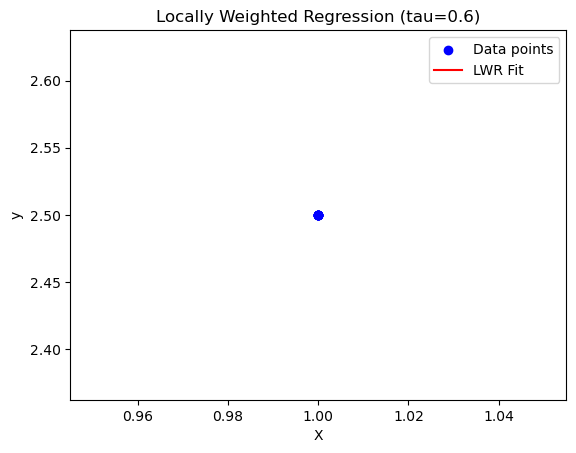

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def gaussian_kernel(x, xi, tau):
    return np.exp(-np.sum((x - xi) ** 2) / (2 * tau ** 2))

def locally_weighted_regression(X, y, query_point, tau):
    m, n = X.shape
    W = np.zeros((m, m))
    
    for i in range(m):
        W[i, i] = gaussian_kernel(query_point, X[i], tau)
    
    X_bias = np.hstack((np.ones((m, 1)), X))
    query_point_bias = np.hstack(([1], query_point))
    
    XTWX = X_bias.T @ W @ X_bias
    if np.linalg.det(XTWX) == 0.0:
        theta = np.linalg.pinv(XTWX) @ X_bias.T @ W @ y
    else:
        theta = np.linalg.inv(XTWX) @ X_bias.T @ W @ y
    
    y_pred = query_point_bias @ theta
    return y_pred

# Manual input of data
print("Enter your data points (X and y values). Enter 'done' when finished.")
data_points = []

while True:
    user_input = input("Enter X and y values separated by space (e.g., '1.0 2.5'): ")
    if user_input.lower() == 'done':
        break
    try:
        x_val, y_val = map(float, user_input.split())
        data_points.append([x_val, y_val])
    except:
        print("Invalid input. Please enter two numbers separated by space.")

# Create DataFrame from input data
data = pd.DataFrame(data_points, columns=['X', 'y'])
X = data[['X']].values  # Must be 2D array
y = data['y'].values

if len(data_points) == 0:
    print("No data points entered. Using default example data.")
    # Default example data if no input provided
    X = np.array([[1], [2], [3], [4], [5]])
    y = np.array([1, 3, 2, 5, 4])

# Sort for plotting
sorted_idx = np.argsort(X.ravel())
X_sorted = X[sorted_idx]
y_sorted = y[sorted_idx]

# Get bandwidth parameter from user
tau = float(input("Enter the bandwidth parameter (tau) for the regression (e.g., 0.5): "))

# Predict y values for all X using LWR
y_pred = np.array([locally_weighted_regression(X, y, x_i, tau) for x_i in X])

# Plot original data and LWR fit
plt.scatter(X, y, label="Data points", color='blue')
plt.plot(X_sorted, y_pred[sorted_idx], label="LWR Fit", color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Locally Weighted Regression (tau={tau})')
plt.legend()
plt.show()